<a href="https://colab.research.google.com/github/mahdiskj/DT_RFclassifier/blob/main/random_forest_classification_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [56]:
dataset = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Encoding categorical data

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# encoder : type of transformation | OneHotEncoder: the type of encoding | [0]: the index of the column we want to perform OneHotEncoding
# passthrough : wewant to keep the values that aren't transformed, unless they are deleted
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# the machine learning method expects the matrix of features as a numpy array:
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
print(X_train)
print(X_test)

[[0.0 1.0 159 154]
 [1.0 0.0 167 153]
 [0.0 1.0 178 117]
 ...
 [1.0 0.0 146 104]
 [0.0 1.0 181 111]
 [0.0 1.0 167 151]]
[[1.0 0.0 178 154]
 [0.0 1.0 183 147]
 [0.0 1.0 166 107]
 [0.0 1.0 159 140]
 [0.0 1.0 152 132]
 [1.0 0.0 153 107]
 [0.0 1.0 188 99]
 [1.0 0.0 179 150]
 [0.0 1.0 181 105]
 [1.0 0.0 168 140]
 [0.0 1.0 166 61]
 [0.0 1.0 153 70]
 [1.0 0.0 167 58]
 [0.0 1.0 149 100]
 [0.0 1.0 174 138]
 [1.0 0.0 185 102]
 [0.0 1.0 161 115]
 [0.0 1.0 174 90]
 [1.0 0.0 155 111]
 [0.0 1.0 144 80]
 [1.0 0.0 150 87]
 [1.0 0.0 185 94]
 [0.0 1.0 178 85]
 [1.0 0.0 181 106]
 [0.0 1.0 185 76]
 [0.0 1.0 188 65]
 [1.0 0.0 153 149]
 [1.0 0.0 186 127]
 [0.0 1.0 142 69]
 [1.0 0.0 177 81]
 [1.0 0.0 153 77]
 [0.0 1.0 144 108]
 [1.0 0.0 158 149]
 [0.0 1.0 154 100]
 [0.0 1.0 174 95]
 [1.0 0.0 198 50]
 [1.0 0.0 180 156]
 [1.0 0.0 172 90]
 [0.0 1.0 184 153]
 [1.0 0.0 174 65]
 [0.0 1.0 153 104]
 [1.0 0.0 188 122]
 [0.0 1.0 169 110]
 [0.0 1.0 183 138]
 [0.0 1.0 165 104]
 [0.0 1.0 189 87]
 [1.0 0.0 196 159]
 [1.0 

## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
print(X_train)
print(X_test)

[[-1.05131497  1.05131497 -0.63012682  1.49496019]
 [ 0.95118973 -0.95118973 -0.14165642  1.46416643]
 [-1.05131497  1.05131497  0.52999039  0.35559097]
 ...
 [ 0.95118973 -0.95118973 -1.42389123 -0.04472794]
 [-1.05131497  1.05131497  0.71316679  0.1708284 ]
 [-1.05131497  1.05131497 -0.14165642  1.40257891]]
[[ 0.95118973 -0.95118973  0.52999039  1.49496019]
 [-1.05131497  1.05131497  0.83528439  1.27940385]
 [-1.05131497  1.05131497 -0.20271522  0.04765335]
 [-1.05131497  1.05131497 -0.63012682  1.06384752]
 [-1.05131497  1.05131497 -1.05753842  0.81749741]
 [ 0.95118973 -0.95118973 -0.99647962  0.04765335]
 [-1.05131497  1.05131497  1.14057839 -0.19869675]
 [ 0.95118973 -0.95118973  0.59104919  1.37178514]
 [-1.05131497  1.05131497  0.71316679 -0.01393418]
 [ 0.95118973 -0.95118973 -0.08059762  1.06384752]
 [-1.05131497  1.05131497 -0.20271522 -1.36885974]
 [-1.05131497  1.05131497 -0.99647962 -1.09171587]
 [ 0.95118973 -0.95118973 -0.14165642 -1.46124102]
 [-1.05131497  1.05131497

## Training the Random Forest Classification model on the Training set

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 45, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [63]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [64]:
# Function to plot the confusion Matrix
import itertools
class_names=np.array(['0','1','2','3','4','5'])
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 92.00 %


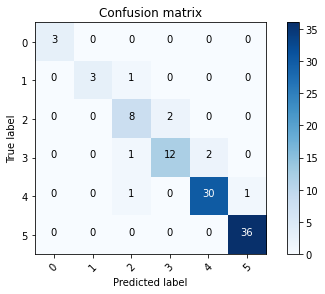

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(accuracy*100))